# Python Practise

## Log and Power transformations

In [1]:
from scipy.optimize import minimize
import numpy as np

np.random.seed(0)

In [9]:
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)
print(vals)
print(vals.shape)
print(vals.reshape(-1, 1).shape)

[0.14377577 2.09352753 4.03370186 ... 0.77853466 1.79450279 0.28626797]
(10000,)
(10000, 1)


<AxesSubplot: ylabel='Count'>

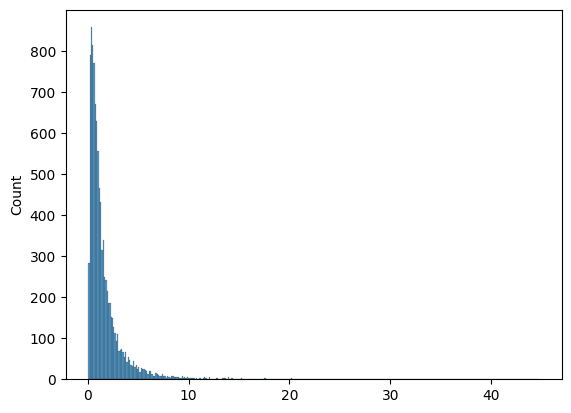

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(vals)

In [13]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))

_, p = normaltest(vals_ss)
print("significance:", p)

significance: [0.]


<AxesSubplot: ylabel='Count'>

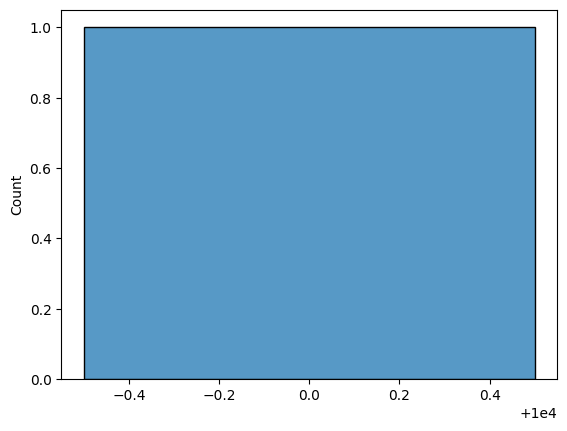

In [17]:
sns.histplot(vals_ss.reshape(-1).shape)

In [19]:
vals_ss.reshape(-1)

array([-0.72743369,  0.22940717,  1.18154792, ..., -0.4159257 ,
        0.08266076, -0.65750563])

In [20]:
from sklearn.preprocessing import minmax_scale

vals_mm = minmax_scale(vals)
_, p = normaltest(vals_mm.squeeze())
print("significance:", p)

significance: 0.0


In [24]:
from seaborn_qqplot import pplot

pplot(vals.reshape(-1), kind='qq')

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

In [25]:
log_transformed = np.log(vals)
_, p = normaltest(log_transformed)
print("significance:", p)

significance: 0.26975774095900606


In [26]:
np.mean(log_transformed), np.std(log_transformed)

(-0.0038555689325038395, 0.9963606439533336)

<AxesSubplot: ylabel='Count'>

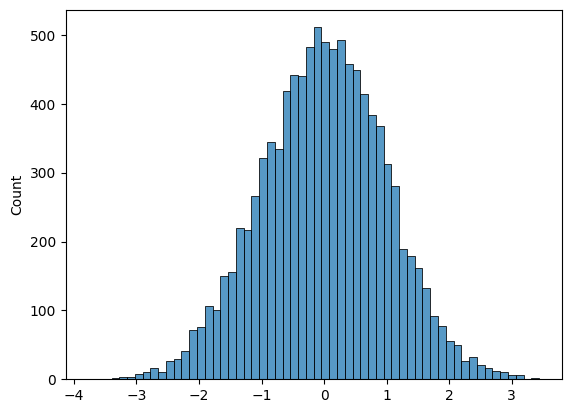

In [27]:
sns.histplot(log_transformed)

<AxesSubplot: ylabel='Count'>

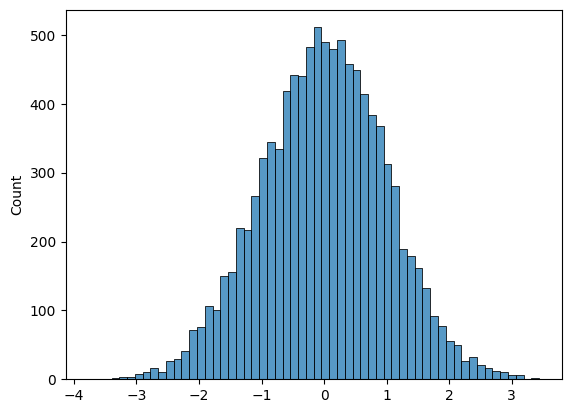

In [29]:
from scipy.stats import boxcox

vals_bc = boxcox(vals, 0.0)
sns.histplot(vals_bc)

In [30]:
_, p = normaltest(vals_bc)
print("significance:", p)

significance: 0.26975774095900606


## Imputation

In [33]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

df = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(df))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [39]:
np.nanmean(np.array(df).reshape(-1))

5.666666666666667

## Holiday Features

In [42]:
from workalendar.europe.united_kingdom import UnitedKingdom
UnitedKingdom().holidays()

[(datetime.date(2023, 1, 1), 'New year'),
 (datetime.date(2023, 1, 2), 'New Year shift'),
 (datetime.date(2023, 4, 7), 'Good Friday'),
 (datetime.date(2023, 4, 9), 'Easter Sunday'),
 (datetime.date(2023, 4, 10), 'Easter Monday'),
 (datetime.date(2023, 5, 1), 'Early May Bank Holiday'),
 (datetime.date(2023, 5, 29), 'Spring Bank Holiday'),
 (datetime.date(2023, 8, 28), 'Late Summer Bank Holiday'),
 (datetime.date(2023, 12, 25), 'Christmas Day'),
 (datetime.date(2023, 12, 26), 'Boxing Day')]

In [44]:
from typing import List
from dateutil.relativedelta import relativedelta, TH
import datetime
from workalendar.usa import California

def create_custom_holidays(year: int) -> List:
    custom_holidays = California().holidays()
    custom_holidays.append((
        (datetime.datetime(year, 11, 1) + relativedelta(weekday=TH(+4))
         + datetime.timedelta(days=1)).date(),
            "Black Friday"
    ))
    
    return {k: v for (k, v) in custom_holidays}

custom_holidays = create_custom_holidays(2021)

In [45]:
custom_holidays

{datetime.date(2023, 1, 1): 'New year',
 datetime.date(2023, 1, 2): 'New year (Observed)',
 datetime.date(2023, 1, 16): 'Birthday of Martin Luther King, Jr.',
 datetime.date(2023, 2, 20): "Washington's Birthday",
 datetime.date(2023, 3, 31): 'Cesar Chavez Day',
 datetime.date(2023, 5, 29): 'Memorial Day',
 datetime.date(2023, 7, 4): 'Independence Day',
 datetime.date(2023, 9, 4): 'Labor Day',
 datetime.date(2023, 11, 10): 'Veterans Day (Observed)',
 datetime.date(2023, 11, 11): 'Veterans Day',
 datetime.date(2023, 11, 23): 'Thanksgiving Day',
 datetime.date(2023, 11, 24): 'Thanksgiving Friday',
 datetime.date(2023, 12, 25): 'Christmas Day',
 datetime.date(2021, 11, 26): 'Black Friday'}

In [47]:
relativedelta(weekday = TH(+4))

relativedelta(weekday=TH(+4))

In [49]:
California().holidays()

[(datetime.date(2023, 1, 1), 'New year'),
 (datetime.date(2023, 1, 2), 'New year (Observed)'),
 (datetime.date(2023, 1, 16), 'Birthday of Martin Luther King, Jr.'),
 (datetime.date(2023, 2, 20), "Washington's Birthday"),
 (datetime.date(2023, 3, 31), 'Cesar Chavez Day'),
 (datetime.date(2023, 5, 29), 'Memorial Day'),
 (datetime.date(2023, 7, 4), 'Independence Day'),
 (datetime.date(2023, 9, 4), 'Labor Day'),
 (datetime.date(2023, 11, 10), 'Veterans Day (Observed)'),
 (datetime.date(2023, 11, 11), 'Veterans Day'),
 (datetime.date(2023, 11, 23), 'Thanksgiving Day'),
 (datetime.date(2023, 11, 24), 'Thanksgiving Friday'),
 (datetime.date(2023, 12, 25), 'Christmas Day')]

In [57]:
def is_holiday(current_date: datetime.date):
    return custom_holidays.get(current_date, False)


today = datetime.date(2023, 3, 29)
is_holiday(today)

False

## Date Annotation

In [54]:
import calendar
calendar.monthrange(2023, 4)

(5, 30)

In [58]:
from datetime import date

def year_anchor(current_date: datetime.date):
    return (
        (current_date - date(current_date.year, 1, 1)).days,
        (date(current_date.year, 12, 31) - current_date).days
    )

year_anchor(today)

(87, 277)

In [64]:
def month_anchor(current_date: datetime.date):
    last_day = calendar.monthrange(current_date.year, current_date.month)[0]
    print('last day', last_day)
    
    return (
        (current_date - datetime.date(current_date.year, current_date.month, 1)).days,
        (current_date - datetime.date(current_date.year, current_date.month, last_day)).days
    )

month_anchor(today)

last day 2


(28, 27)

## Paydays

In [65]:
def get_last_friday(current_date: datetime.date, weekday=calendar.FRIDAY):
    return max(week[weekday]
               for week in calendar.monthcalendar(
                   current_date.year, current_date.month
               ))

get_last_friday(today)

31

## Automated Feature Extraction

In [70]:
import pandas as pd
import featuretools as ft
from featuretools.primitives import Minute, Hour, Day, Month, Year, Weekday

data = pd.DataFrame(
    {
        'Time': ['2014-01-01 01:41:50',
                 '2014-01-01 02:06:50',
                 '2014-01-01 02:31:50',
                 '2014-01-01 02:56:50',
                 '2014-01-01 03:21:50'
                ],
        'Target': [0, 0, 0, 0, 1]
    }
)
data['index'] = data.index
es = ft.EntitySet('My EntitySet')
es.add_dataframe(
    dataframe_name='main_data_table',
    index='index',
    dataframe=data,
    time_index='Time'
)
fm, features = ft.dfs(
    entityset=es,
    target_entity='main_data_table',
    trans_primitives=[Minute, Hour, Day, Month, Year, Weekday]
)

TypeError: dfs() got an unexpected keyword argument 'target_entity'

## ROCKET